In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
plt.style.use('ggplot')

In [87]:
def numerical_converter(n):
    try:
        return int(n)
    except ValueError:
        return float(n)

with open('results.dat','r') as f:
    next(f)
    df = pd.DataFrame(map(numerical_converter, l.rstrip().split()) for l in f) # reading file

    df.columns = ['C0', 'N', 'idle'] # setting the header

In [88]:
df.head() # displaying five first rows

,C0,N,idle
0,22,1,68.95
1,38,2,57.59
2,51,3,53.07
3,64,4,51.55
4,76,5,44.56


## Ui vs N
Ui is the utilisation of resource, `Ui = Bi / T`

N is the number of concurrent users

Bi is the total busy time of the resource in T

T is the length of time in the observation period

The resource here is the CPU, each loadtest runs during 5 seconds and a summary is generated at 4 seconds, the busy time will be calculated with the formula `100 - idle`.

`Ui = (100 - idle) / 4`

In [89]:
df['Ui'] = (100 - df['idle']) / 4 # calculating Ui

In [90]:
df.head() # displaying five first rows

,C0,N,idle,Ui
0,22,1,68.95,7.7625
1,38,2,57.59,10.6025
2,51,3,53.07,11.7325
3,64,4,51.55,12.1125
4,76,5,44.56,13.8600


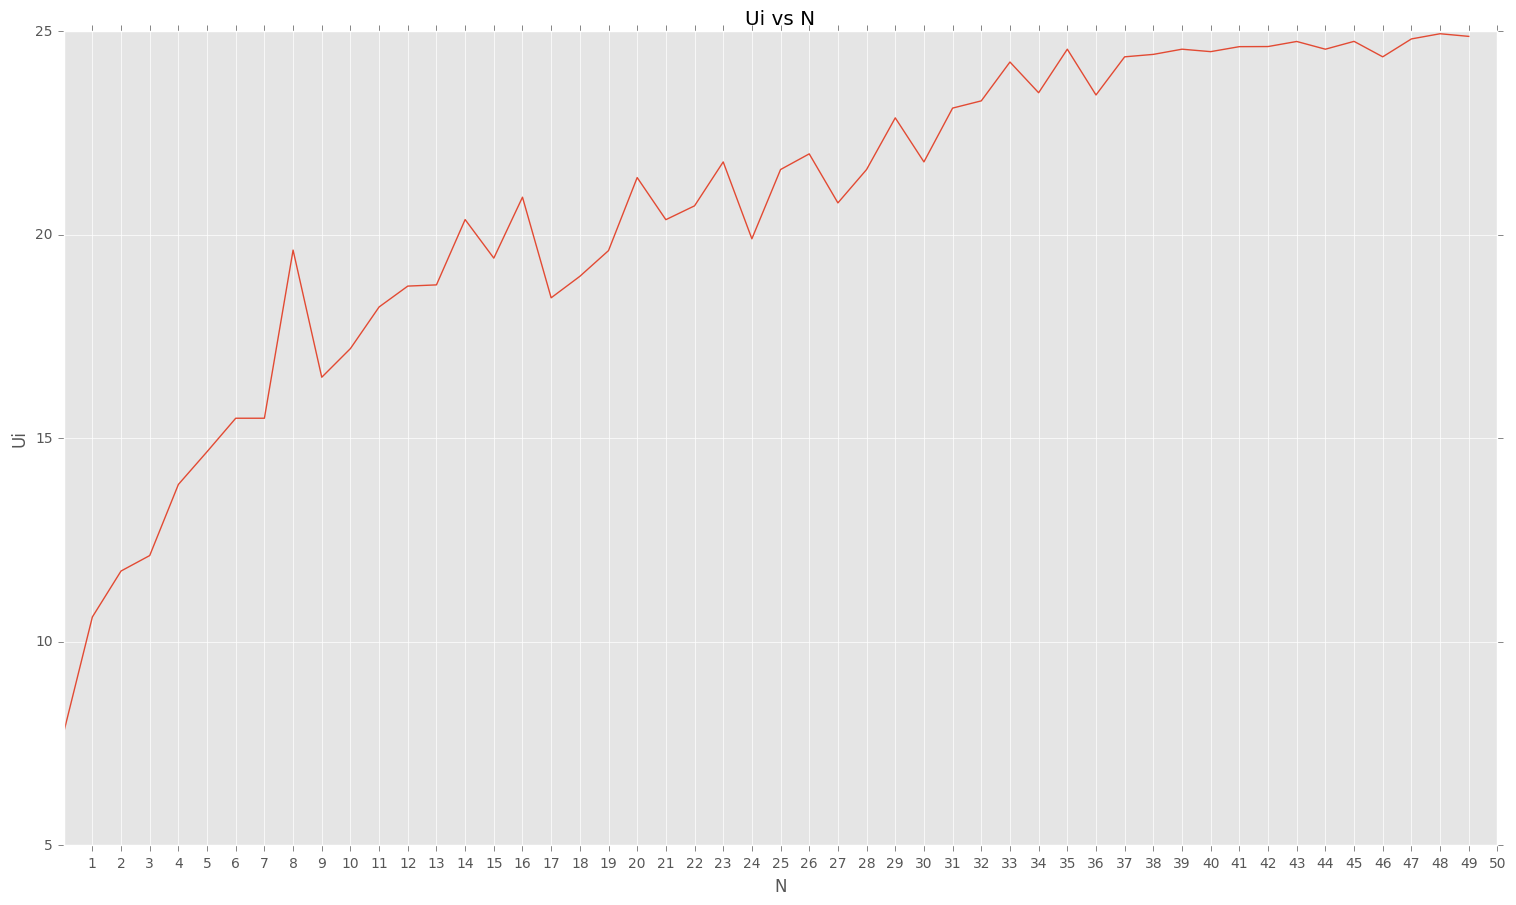

In [91]:
plt.plot(df['Ui'])
plt.xticks(df['N'])
plt.title("Ui vs N")
plt.xlabel("N")
plt.ylabel("Ui")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Di vs N
Di is the service demand, `Di = Vi * Si = Ui / X0`

N is the number of concurrent users

X0 is the throughput `X0 = C0/T = C0 / 4`

T is the length of time in the observation period


`Di = Ui / (C0 / 4)`

In [92]:
df['Di'] = df['Ui']/(df['C0']/4)

In [93]:
df.head()

,C0,N,idle,Ui,Di
0,22,1,68.95,7.7625,1.411364
1,38,2,57.59,10.6025,1.116053
2,51,3,53.07,11.7325,0.920196
3,64,4,51.55,12.1125,0.757031
4,76,5,44.56,13.8600,0.729474


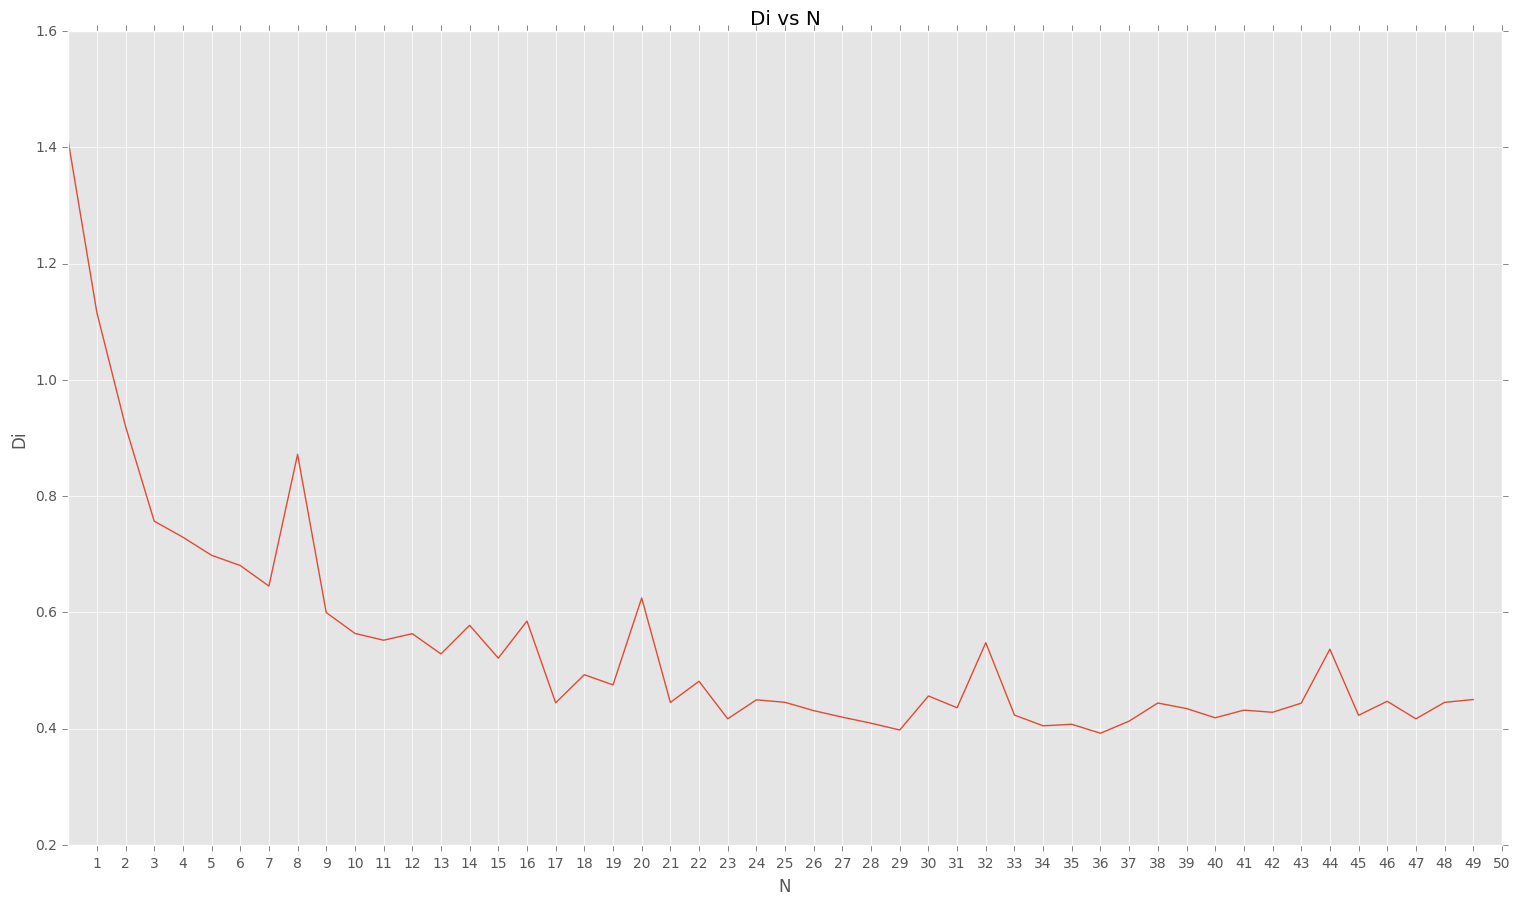

In [94]:
plt.plot(df['Di'])
plt.xticks(df['N'])
plt.title("Di vs N")
plt.xlabel("N")
plt.ylabel("Di")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## X0 vs N
X0 is the system throughput, `X0 = C0 / T`

T is the length of time in the observation period

In [95]:
df['X0'] = df['C0'] / 4

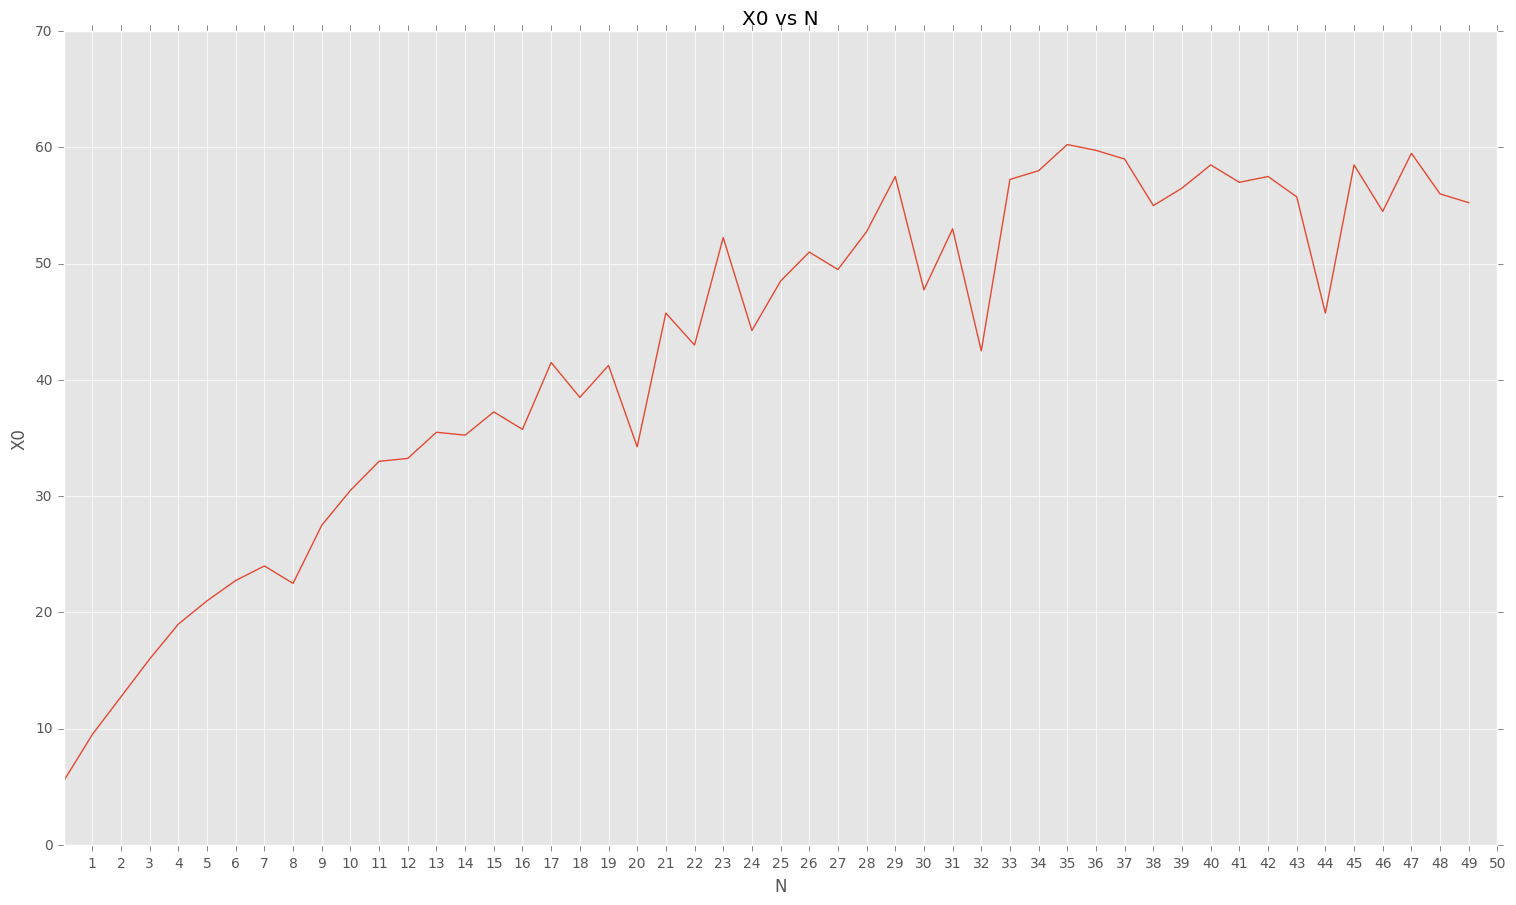

In [96]:
plt.plot(df['X0'])
plt.xticks(df['N'])
plt.title("X0 vs N")
plt.xlabel("N")
plt.ylabel("X0")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## R vs N
R is the interactive response time, `R = (M / X0) - Z`

Z is the average think time

M is the number of concurrent users, here `M = N`

## Summary

In [121]:
summary = df.drop('N', 1).describe()[1:] # Strip off count as it will always be 50, Excluding N
summary

,C0,idle,Ui,Di,X0
mean,170.260000,17.95720,20.510700,0.541201,42.565000
std,60.846347,16.97755,4.244388,0.194444,15.211587
min,22.000000,0.25000,7.762500,0.392176,5.500000
25%,134.000000,2.52000,18.742500,0.428933,33.500000
50%,183.000000,13.99500,21.501250,0.449921,45.750000
75%,223.750000,25.03000,24.370000,0.574388,55.937500
max,241.000000,68.95000,24.937500,1.411364,60.250000


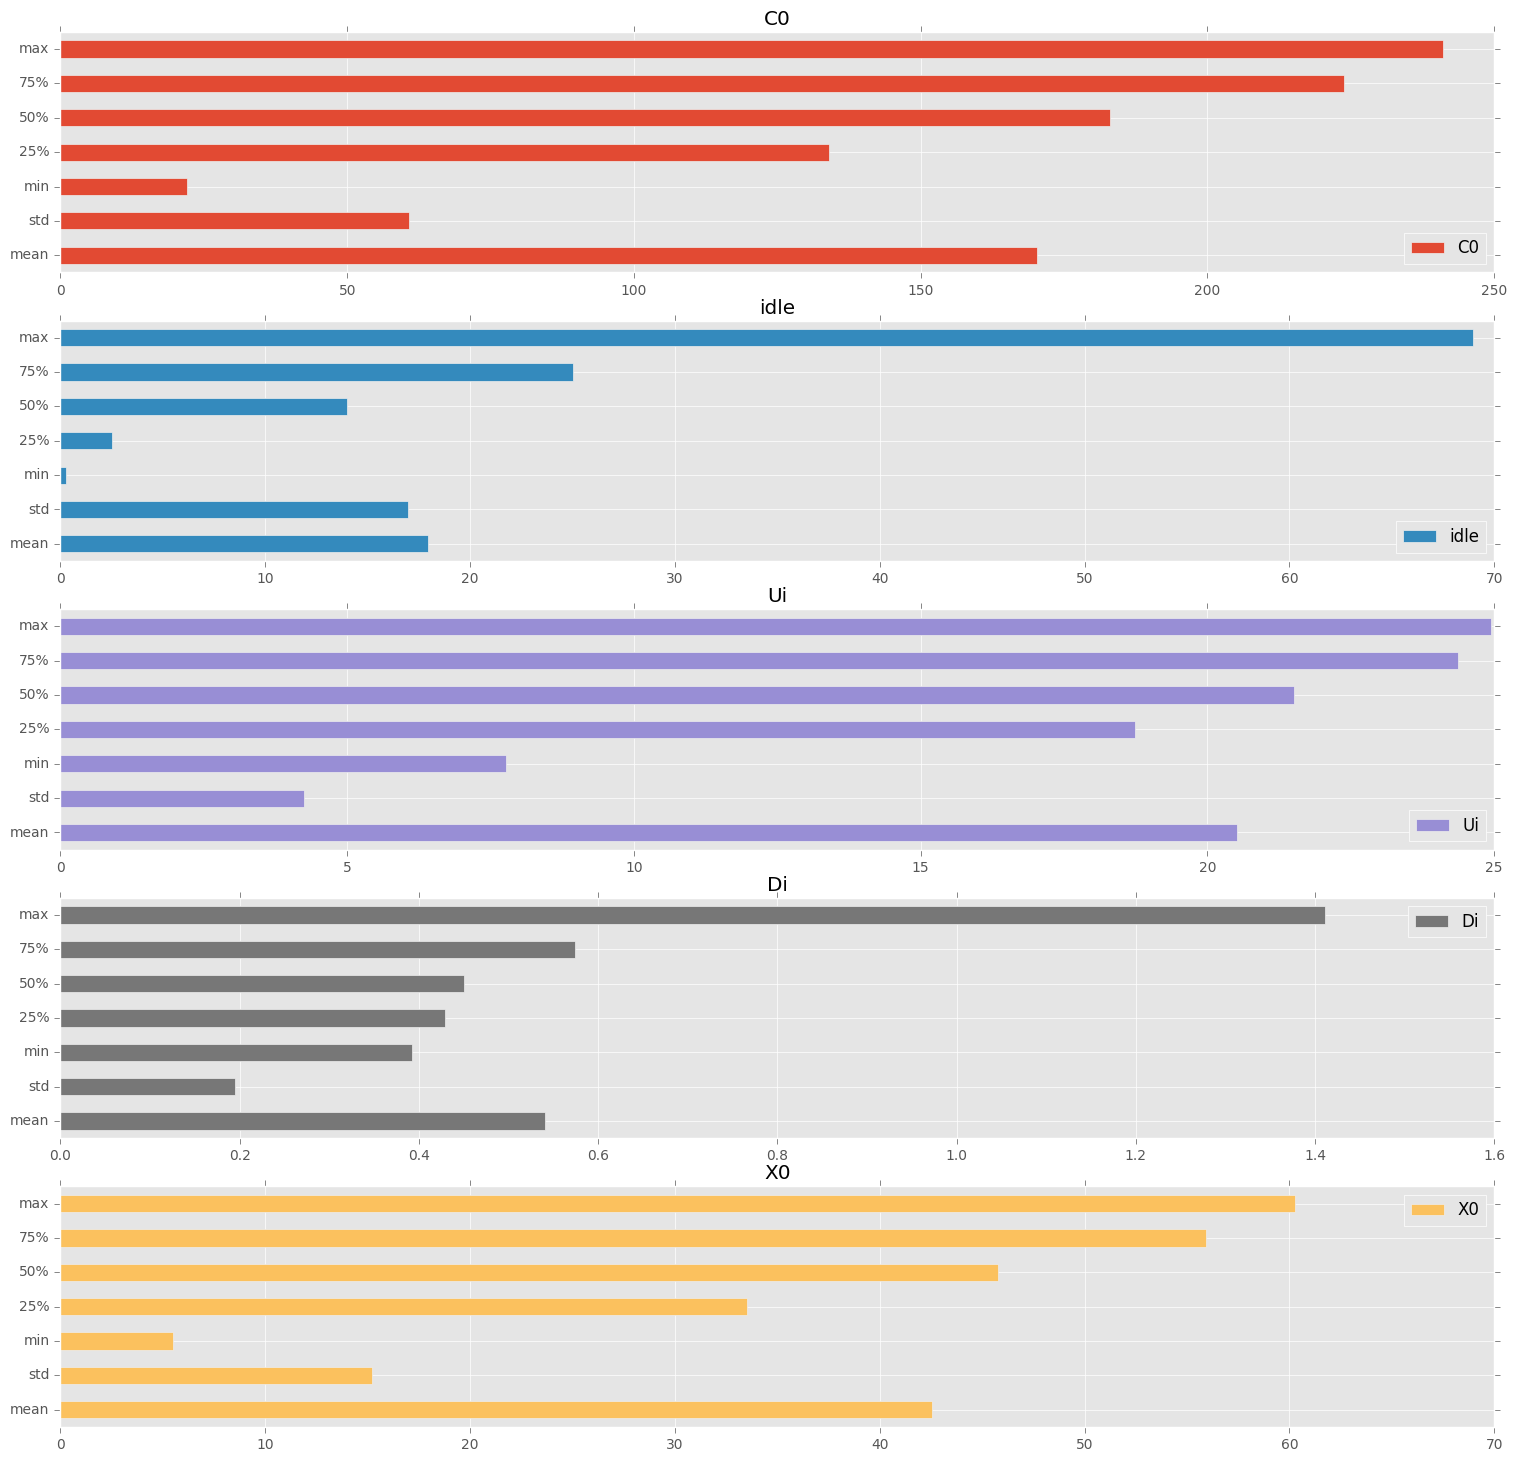

In [127]:
summary.plot(kind='barh', subplots=True, sharex=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 18)

plt.show()